In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from plotly import express, graph_objects
import seaborn as sb

In [16]:
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv('Fraud_check.csv')

In [18]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [19]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [20]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB
None


,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [21]:
data.shape

(600, 6)

In [22]:
print(data.ndim)
print(data.axes)
print(data.columns)
data.nunique

2
[RangeIndex(start=0, stop=600, step=1), Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')]
Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')


<bound method DataFrame.nunique of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..        

In [23]:
missing_data = data.isna().sum()

In [24]:
print("Total missing data: ", missing_data)

Total missing data:  Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64


In [25]:
data[data.duplicated()].shape

(0, 6)

In [26]:
data = data.rename({"Marital.Status":"Marital_S", "Taxable.Income":"Tax_Inc", "City.Population":"Pop", "Work.Experience":"Work_Exp"}, axis = 1)

In [27]:
col_names = ["Undergrad", "Marital_S", "Urban"]

In [28]:
for val in col_names:
    print(data[val].value_counts())

Undergrad
YES    312
NO     288
Name: count, dtype: int64
Marital_S
Single      217
Married     194
Divorced    189
Name: count, dtype: int64
Urban
YES    302
NO     298
Name: count, dtype: int64


In [29]:
conditions = [(data['Tax_Inc'] <= 30000), (data['Tax_Inc'] > 30000)]
conditions

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 595    False
 596    False
 597    False
 598    False
 599    False
 Name: Tax_Inc, Length: 600, dtype: bool,
 0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 595    True
 596    True
 597    True
 598    True
 599    True
 Name: Tax_Inc, Length: 600, dtype: bool]

In [30]:
choices = ["Risky", "Good"]

In [31]:
data['Tax_Inc'] = np.select(conditions, choices)

In [32]:
data.head(20)

,Undergrad,Marital_S,Tax_Inc,Pop,Work_Exp,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
5,NO,Divorced,Good,116382,0,NO
6,NO,Divorced,Good,80890,8,YES
7,YES,Single,Good,131253,3,YES
8,NO,Single,Good,102481,12,YES
9,YES,Divorced,Good,155482,4,YES


In [33]:
label_data = data['Tax_Inc'].value_counts()
label_data

Tax_Inc
Good     476
Risky    124
Name: count, dtype: int64

In [34]:
print("Percentages for each")
total = label_data[0] + label_data[1]
print("percentage of 0: ", (label_data[0]/total) * 100)
print("percentage of 1: ", (label_data[1]/total) * 100)

Percentages for each
percentage of 0:  79.33333333333333
percentage of 1:  20.666666666666668


In [35]:
expl = (0.1, 0.1)

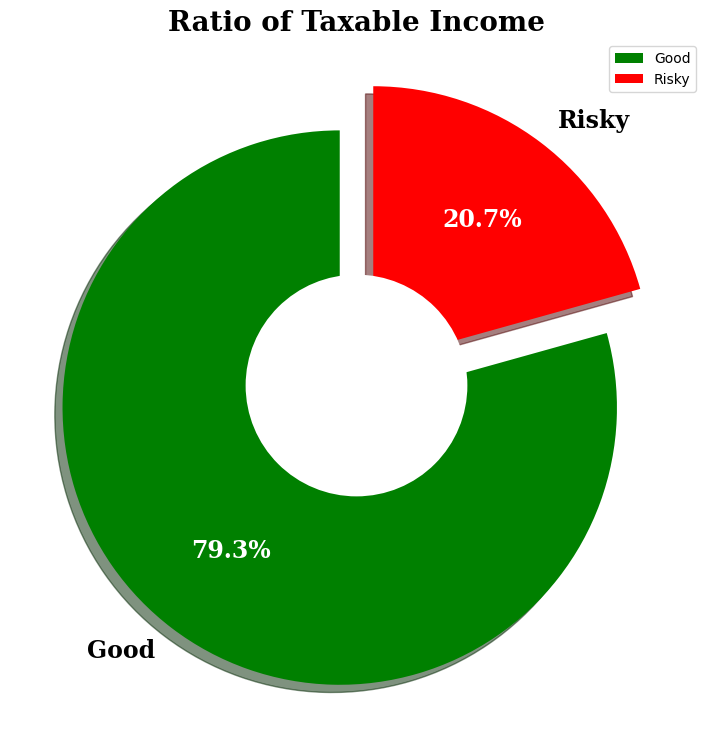

In [36]:
plt.figure(figsize = (15, 9))
patches, texts, pcts = plt.pie(label_data, labels = label_data.index, colors = ['green', 'red'], pctdistance=0.65, shadow=True, explode = expl, startangle=90, autopct='%1.1f%%', textprops={'fontsize':17, 'color':'black', 'weight':'bold', 'family':'serif'})
plt.setp(pcts, color='white')
hfont = {'weight':'bold', 'family':'serif'}
plt.title('Ratio of Taxable Income', size=20, **hfont)
centre_circle = plt.Circle((0,0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Good', 'Risky'], loc='upper right')
plt.show()

In [23]:
continue_col = ["Pop", "Work_Exp"]

In [24]:
category_col = ["Undergrad", "Marital_S", "Tax_Inc", "Urban"]

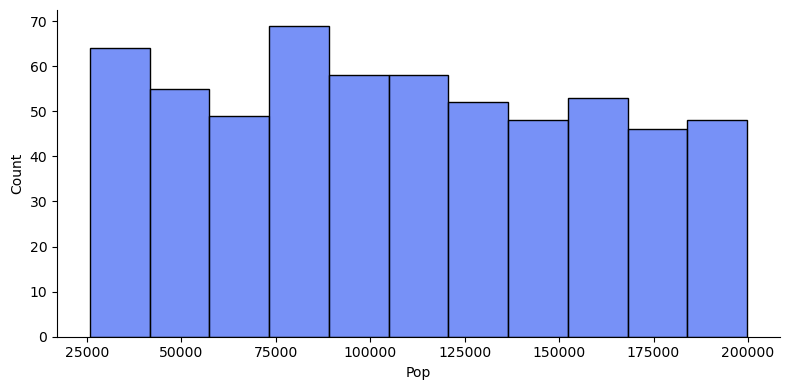

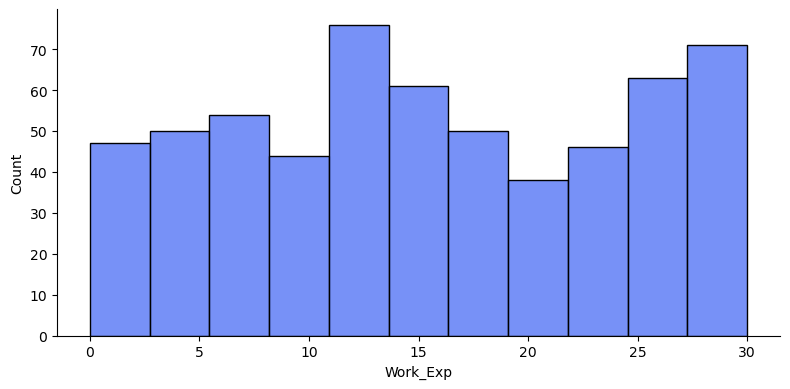

In [25]:
for cols in continue_col:
    sb.displot(data, x=cols, height=4, aspect=2, color="#496DF5")
    plt.show()

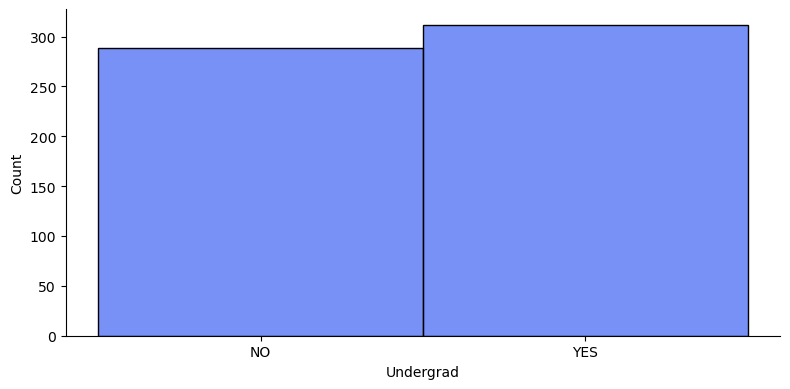

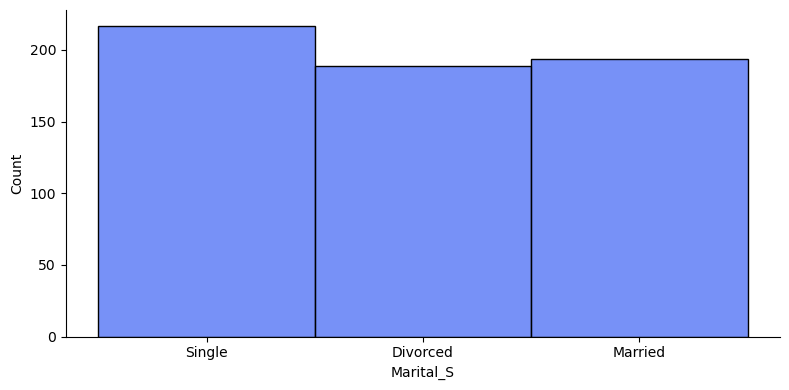

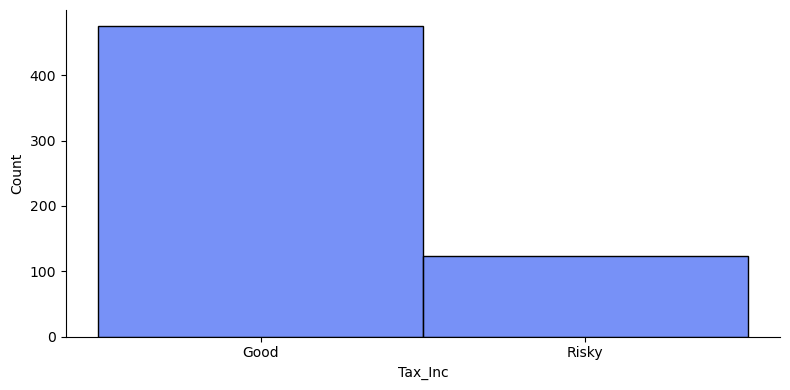

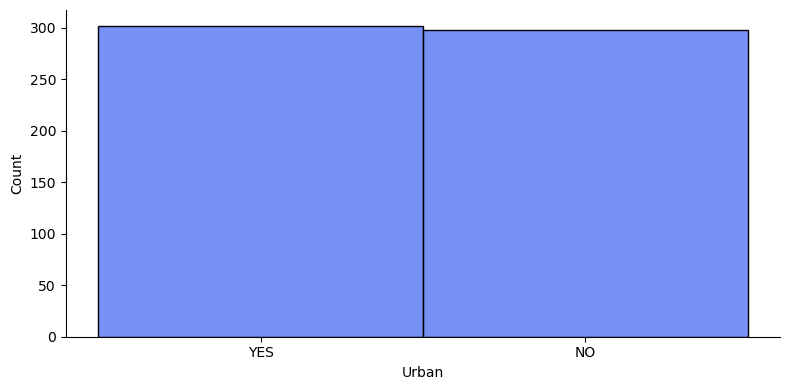

In [26]:
for cols in category_col:
    sb.displot(data, x=cols, height=4, aspect=2, color="#496DF5")
    plt.show()

In [27]:
data = pd.get_dummies(data, columns=['Urban', 'Undergrad'], drop_first=True)

In [28]:
data.head()

,Marital_S,Tax_Inc,Pop,Work_Exp,Urban_YES,Undergrad_YES
0,Single,Good,50047,10,True,False
1,Divorced,Good,134075,18,True,True
2,Married,Good,160205,30,True,False
3,Single,Good,193264,15,True,True
4,Married,Good,27533,28,False,False


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
string_columns = ['Marital_S', 'Tax_Inc']

In [31]:
number = LabelEncoder()

In [32]:
for i in string_columns:
    data[i] = number.fit_transform(data[i])

In [33]:
data.head()

,Marital_S,Tax_Inc,Pop,Work_Exp,Urban_YES,Undergrad_YES
0,2,0,50047,10,True,False
1,0,0,134075,18,True,True
2,1,0,160205,30,True,False
3,2,0,193264,15,True,True
4,1,0,27533,28,False,False


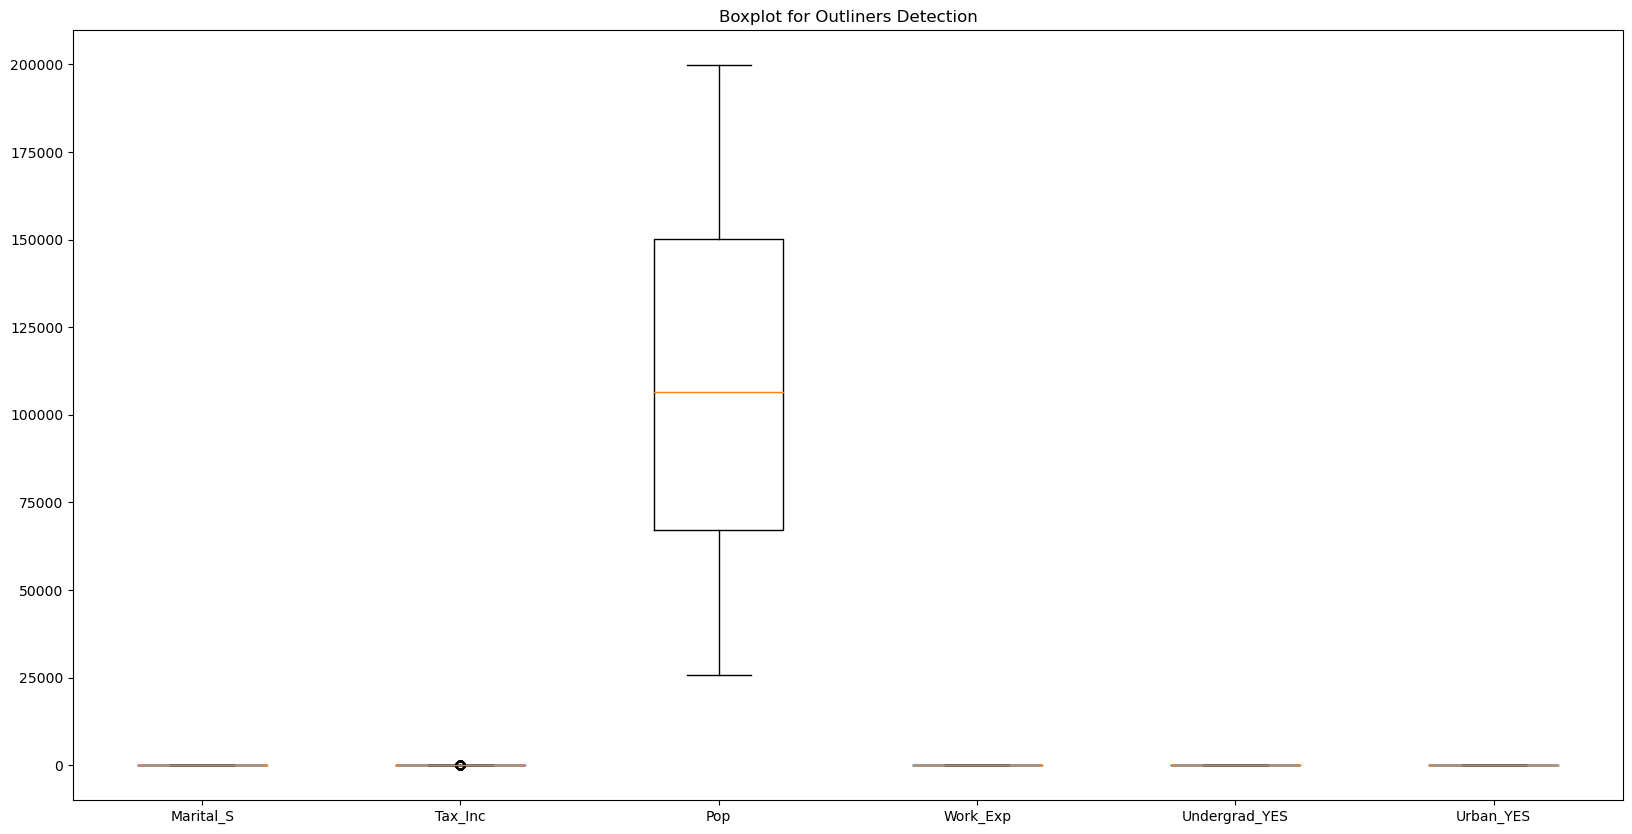

In [34]:
plt.figure(figsize = (20,10))
plt.boxplot(data, labels=['Marital_S', "Tax_Inc", "Pop", "Work_Exp", "Undergrad_YES", "Urban_YES"])
plt.title("Boxplot for Outliners Detection")
plt.show()

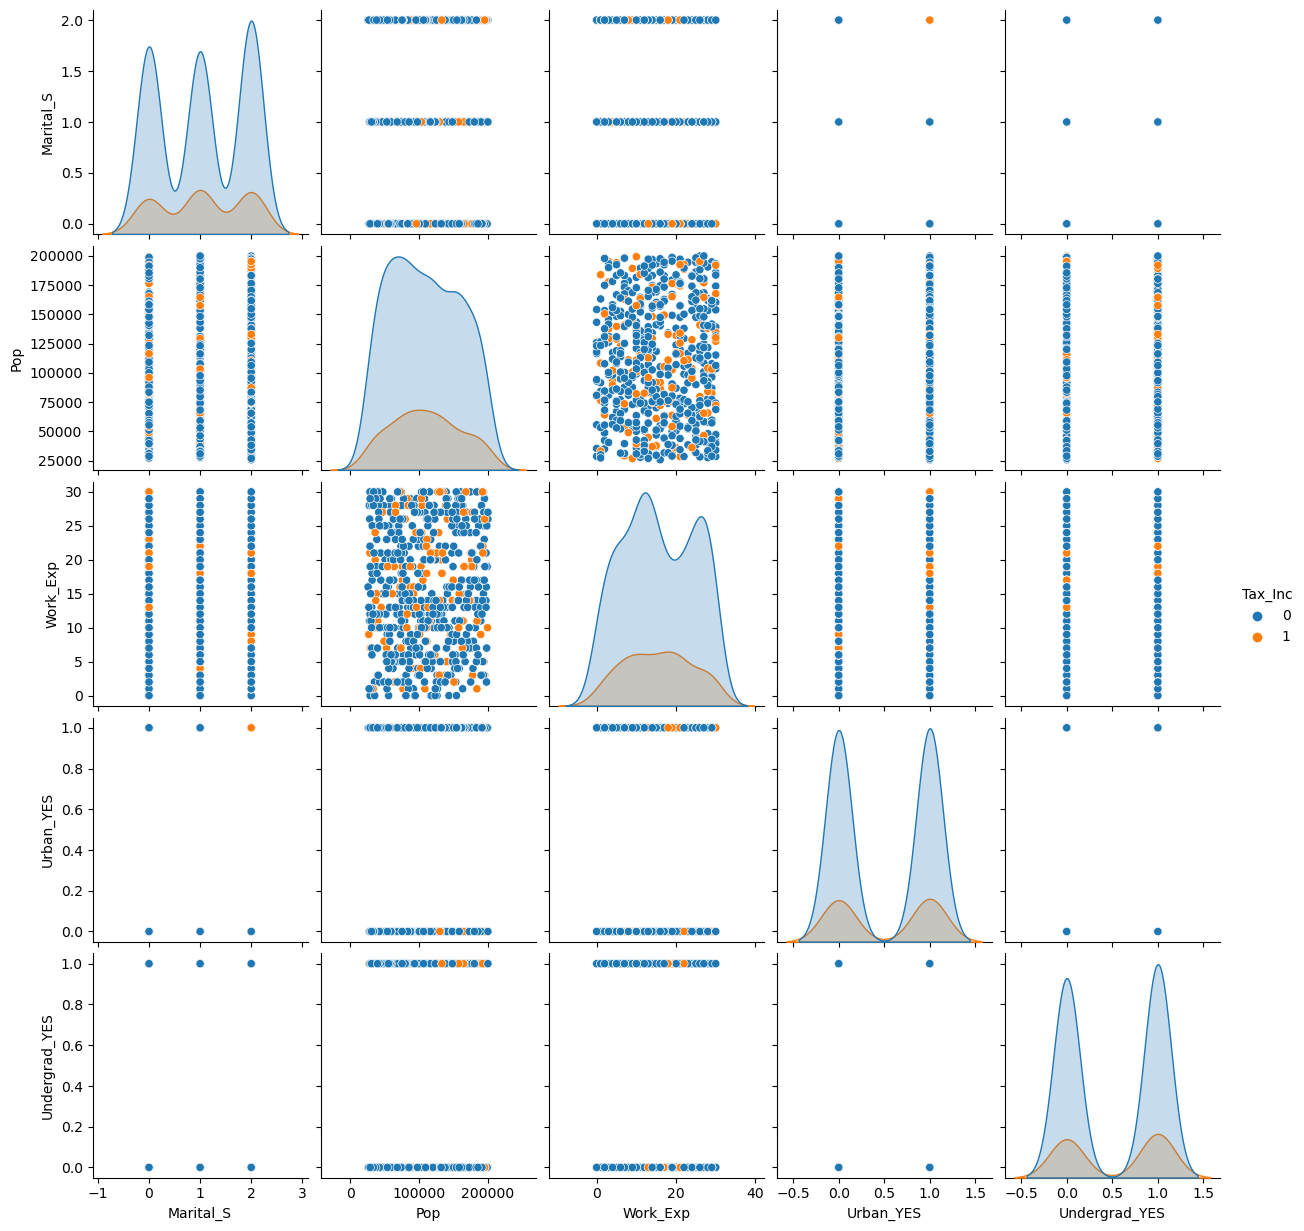

In [35]:
sb.pairplot(data=data, hue='Tax_Inc')
plt.show()

<Axes: >

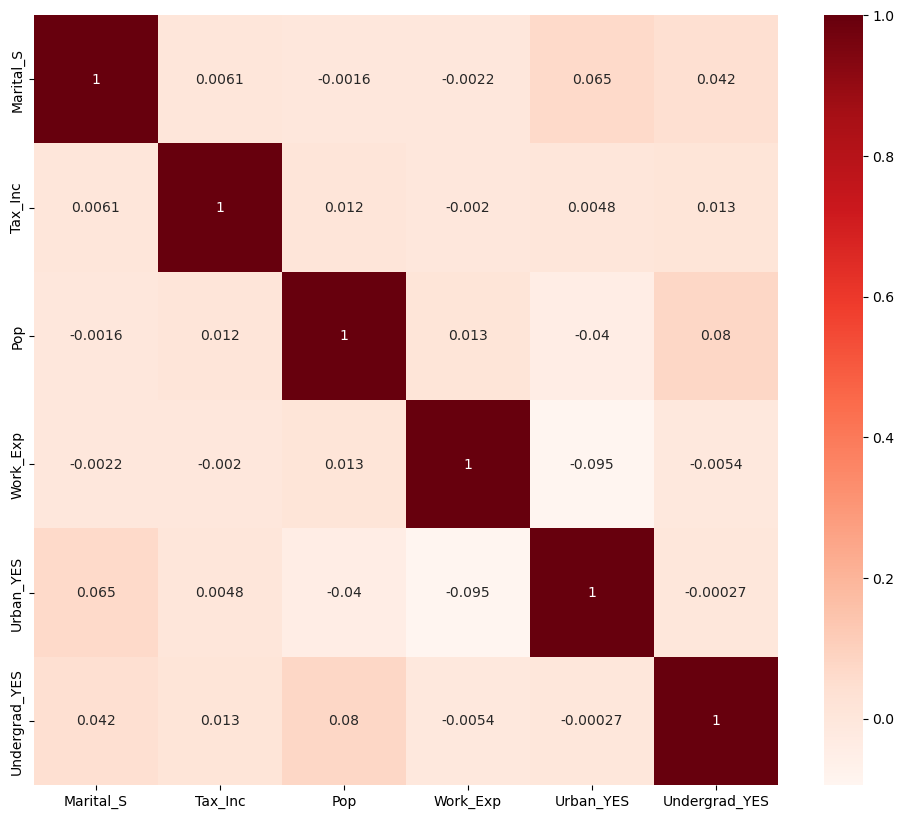

In [36]:
plt.figure(figsize = (12, 10))
sb.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)

In [37]:
X = data.drop('Tax_Inc', axis=1)

In [38]:
Y = data['Tax_Inc']

In [39]:
X.head()

,Marital_S,Pop,Work_Exp,Urban_YES,Undergrad_YES
0,2,50047,10,True,False
1,0,134075,18,True,True
2,1,160205,30,True,False
3,2,193264,15,True,True
4,1,27533,28,False,False


In [40]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Tax_Inc, dtype: int32

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [42]:
ms = StandardScaler()
X = pd.DataFrame(ms.fit_transform(X))
X.head()

,0,1,2,3,4
0,1.160800,-1.178521,-0.629143,0.993355,-1.040833
1,-1.274445,0.508500,0.276370,0.993355,0.960769
2,-0.056822,1.033109,1.634639,0.993355,-1.040833
3,1.160800,1.696831,-0.063197,0.993355,0.960769
4,-0.056822,-1.630532,1.408261,-1.006689,-1.040833


In [43]:
N_Fold = KFold(n_splits = 10)
rf_Model = RandomForestClassifier()
results = cross_val_score(rf_Model, X, Y, cv = N_Fold)
results

array([0.73333333, 0.73333333, 0.66666667, 0.68333333, 0.73333333,
       0.66666667, 0.88333333, 0.7       , 0.75      , 0.83333333])

In [44]:
np.mean(results)

0.7383333333333333

In [45]:
np.std(results)

0.06710274046399133

In [46]:
rf_Model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4)

In [47]:
results = cross_val_score(rf_Model, X, Y, cv = N_Fold)
results

array([0.78333333, 0.76666667, 0.71666667, 0.75      , 0.81666667,
       0.71666667, 0.9       , 0.75      , 0.85      , 0.88333333])

In [48]:
results.std()

0.06289320754704403

In [49]:
results.mean()

0.7933333333333332

In [50]:
rf_Model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3)
results = cross_val_score(rf_Model, X, Y, cv = N_Fold)
results

array([0.78333333, 0.76666667, 0.71666667, 0.75      , 0.81666667,
       0.71666667, 0.9       , 0.75      , 0.85      , 0.88333333])

In [51]:
results.mean()

0.7933333333333332

In [52]:
results.std()

0.06289320754704403